# Final Assignment

# Libraries

In [1]:

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
from patsy import dmatrices
from sklearn.model_selection import GridSearchCV
from scipy import stats
import statsmodels.api as sm
from ISLP import confusion_table
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Data Cleaning 
1. Outlier and High Leverage Values Removal
3. Clean X and y

In [237]:
train_data = pd.read_csv('training_data/training_data.csv' , sep=";")
test_data = pd.read_csv('test_data_no_target/test_data_no_target.csv', sep=";")
train_data.info

<bound method DataFrame.info of      Group            I1            I2            I3            I4  \
0       G9   0,136495061   -0,02842866  -0,037771783  -0,232458668   
1       G5  -0,714521622  -0,042137266  -0,052967899  -0,796862406   
2      G10   0,104791084  -0,038187827  -0,053190774   0,620232526   
3       G2  -0,532846963  -0,006581684  -0,023377468   1,306702483   
4       G3  -0,200814523  -0,016334161  -0,036753591  -0,886674882   
...    ...           ...           ...           ...           ...   
7995    G1    -0,9464775  -0,039767018  -0,051916185           NaN   
7996    G7  -0,521182947  -0,038272071  -0,047929148  -0,820631895   
7997    G2   0,323233374  -0,031074684  -0,045712969  -0,105448254   
7998    G4   1,084416313  -0,028496578  -0,047527571  -0,180118054   
7999    G2   0,373260933   -0,03029381  -0,042319432   0,675851127   

                I5            I6            I7            I8            I9  \
0     -0,016221513  -0,187506244  -0,322545081  -

In [238]:
test_data.info

<bound method DataFrame.info of      Group            I1            I2            I3            I4  \
0       G3   0,039283602  -0,034382297  -0,040372758   0,090022863   
1       G9   -0,49171284  -0,039484003  -0,043611749  -0,320311784   
2       G7  -0,744978606  -0,038270979  -0,038631212  -0,824020601   
3       G2   0,694506862  -0,026038231  -0,038985338   1,892921303   
4       G2   0,207123179  -0,020461894  -0,033451402  -0,010191074   
...    ...           ...           ...           ...           ...   
1995    G9   -1,19292389  -0,049078613  -0,049806363  -0,513692306   
1996   G11   0,761005947  -0,028789812    -0,0405864  -0,098536772   
1997    G4   0,663619883  -0,014720892  -0,035248591   2,367520546   
1998    G1  -0,887895947   -0,03114856  -0,044787049           NaN   
1999    G8   0,691366543  -0,022306812  -0,034866587  -0,377679746   

                I5            I6            I7            I8            I9  \
0     -0,055952942   0,049228792   0,016236327  -

In [239]:
print(train_data.isnull().count())
print(train_data.isnull().sum())

Group      8000
I1         8000
I2         8000
I3         8000
I4         8000
           ... 
dI56       8000
dI57       8000
dI58       8000
Class      8000
Perform    8000
Length: 119, dtype: int64
Group        0
I1           0
I2           0
I3           0
I4         525
          ... 
dI56        20
dI57       135
dI58       249
Class        0
Perform      0
Length: 119, dtype: int64


In [240]:
# Check which columns still have missing values
missing_values_train = train_data.isnull().sum()
print("Missing values by column:")
print(missing_values_train)

# Fill non-numeric columns with a specific value (e.g., mode or a placeholder)
for column in train_data.columns:
    if train_data[column].dtype == 'object':  # Non-numeric columns
        mode_value = train_data[column].mode()[0]  # Calculate the mode (most frequent value)
        train_data[column] = train_data[column].fillna(mode_value)

# Display the DataFrame after filling missing values in non-numeric columns
#print("\nDataFrame after filling missing values in non-numeric columns:")
#print(X.to_string())  # Convert the DataFrame to string format for display



Missing values by column:
Group        0
I1           0
I2           0
I3           0
I4         525
          ... 
dI56        20
dI57       135
dI58       249
Class        0
Perform      0
Length: 119, dtype: int64


In [241]:
missing_train_values_later = train_data.isnull().sum()
print(missing_train_values_later)

Group      0
I1         0
I2         0
I3         0
I4         0
          ..
dI56       0
dI57       0
dI58       0
Class      0
Perform    0
Length: 119, dtype: int64


In [242]:
print(test_data.isnull().count())
print(test_data.isnull().sum())

Group    2000
I1       2000
I2       2000
I3       2000
I4       2000
         ... 
dI54     2000
dI55     2000
dI56     2000
dI57     2000
dI58     2000
Length: 117, dtype: int64
Group      0
I1         0
I2         0
I3         0
I4       119
        ... 
dI54       0
dI55      46
dI56       9
dI57      34
dI58      67
Length: 117, dtype: int64


In [243]:
# Check which columns still have missing values
missing_values_test = test_data.isnull().sum()
print("Missing values by column:")
print(missing_values_test)

# Fill non-numeric columns with a specific value (e.g., mode or a placeholder)
for column in test_data.columns:
    if test_data[column].dtype == 'object':  # Non-numeric columns
        mode_value = test_data[column].mode()[0]  # Calculate the mode (most frequent value)
        test_data[column] = test_data[column].fillna(mode_value)

# Display the DataFrame after filling missing values in non-numeric columns
#print("\nDataFrame after filling missing values in non-numeric columns:")
#print(y.to_string())  # Convert the DataFrame to string format for display


Missing values by column:
Group      0
I1         0
I2         0
I3         0
I4       119
        ... 
dI54       0
dI55      46
dI56       9
dI57      34
dI58      67
Length: 117, dtype: int64


In [244]:
missing_test_values_later = test_data.isnull().sum()
print(missing_test_values_later)

Group    0
I1       0
I2       0
I3       0
I4       0
        ..
dI54     0
dI55     0
dI56     0
dI57     0
dI58     0
Length: 117, dtype: int64


In [48]:
test_data

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,NaN,0.039284,-0.034382,-0.040373,0.090023,-0.055953,0.049229,0.016236,-0.045865,0.692039,...,-0.377892,-0.410908,-0.417438,-0.220481,0.002526,0.124543,-0.219341,0.148324,0.020379,-0.004969
1,NaN,-0.491713,-0.039484,-0.043612,-0.320312,0.065520,-0.216314,-0.366573,-0.052790,-0.370449,...,0.553799,0.660505,0.806000,0.781506,-0.012519,-0.014169,0.669341,0.015033,0.023411,0.007037
2,NaN,-0.744979,-0.038271,-0.038631,-0.824021,0.117907,-1.434879,-0.707810,-0.073176,-1.698337,...,0.707252,0.909110,0.738062,-0.024403,0.032079,0.095528,0.350733,-0.149682,0.005134,1.135389
3,NaN,0.694507,-0.026038,-0.038985,1.892921,-0.100102,0.022436,-0.198048,-0.050572,0.208738,...,-0.120561,-0.118927,-0.130250,-0.000468,0.002082,0.023541,-0.044464,0.033332,0.079054,-0.002624
4,NaN,0.207123,-0.020462,-0.033451,-0.010191,-0.146812,0.235521,0.044640,-0.029062,0.464286,...,-0.672086,-0.679972,-1.136937,-0.789870,0.007839,-0.424394,-0.704341,0.011889,0.936284,-0.015745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,-1.192924,-0.049079,-0.049806,-0.513692,-0.081669,-0.334987,-0.484038,-0.063376,-0.860113,...,0.280022,0.197899,0.425563,0.146857,0.007887,0.144111,0.556732,0.809250,0.040464,-0.000838
1996,NaN,0.761006,-0.028790,-0.040586,-0.098537,0.334470,0.177993,0.733065,-0.032186,2.498567,...,-0.140446,-0.175890,-0.044562,0.508117,0.007100,0.492209,0.634159,-0.389522,0.030106,0.019739
1997,NaN,0.663620,-0.014721,-0.035249,2.367521,0.035822,0.437514,0.241244,-0.033637,0.475282,...,-0.562151,-0.694239,-0.974187,0.052026,0.026136,0.287294,-0.278286,-0.283358,-0.005308,0.001944
1998,NaN,-0.887896,-0.031149,-0.044787,-0.000487,3.235044,9.613638,10.032149,0.096885,0.049668,...,-0.021892,-0.175890,-0.042313,0.018701,-0.117762,0.038035,-0.140377,-1.110764,-0.000111,0.000807


# Change Commas with Decimal Points

In [245]:
import pandas as pd

# Assuming X is your DataFrame

# Define a function to convert numerical data in X from comma to period as a decimal separator
def convert_decimal_separator(df):
    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Replace commas with periods in the data
        df[column] = df[column].astype(str).str.replace(',', '.')
        
        # Convert the column to numeric type
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Call the function to convert decimal separator in X
convert_decimal_separator(train_data)

# Display the DataFrame after converting the decimal separator
print("DataFrame after converting decimal separator from comma to period:")
print(train_data)


DataFrame after converting decimal separator from comma to period:
      Group        I1        I2        I3        I4        I5        I6  \
0       NaN  0.136495 -0.028429 -0.037772 -0.232459 -0.016222 -0.187506   
1       NaN -0.714522 -0.042137 -0.052968 -0.796862 -0.018394  0.070102   
2       NaN  0.104791 -0.038188 -0.053191  0.620233  0.148587  0.489875   
3       NaN -0.532847 -0.006582 -0.023377  1.306702 -0.068909  0.048024   
4       NaN -0.200815 -0.016334 -0.036754 -0.886675  0.484495 -1.148744   
...     ...       ...       ...       ...       ...       ...       ...   
7995    NaN -0.946477 -0.039767 -0.051916 -0.000843 -9.099326  1.470616   
7996    NaN -0.521183 -0.038272 -0.047929 -0.820632 -0.179414 -0.774646   
7997    NaN  0.323233 -0.031075 -0.045713 -0.105448 -0.103823  0.153551   
7998    NaN  1.084416 -0.028497 -0.047528 -0.180118 -0.634162  0.143589   
7999    NaN  0.373261 -0.030294 -0.042319  0.675851 -0.099477 -0.113594   

            I7        I8        

In [246]:
target= train_data['Class']



In [247]:
train_data.drop(['Group', 'Class'], axis=1, inplace=True)
train_data

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Perform
0,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,-0.014757,...,0.077110,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-0.033764
1,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,-0.037353,...,0.006128,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,0.127771
2,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,-0.025008,...,-0.001239,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,0.183500
3,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,-0.011783,...,-0.001239,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-0.035668
4,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,-0.023262,...,-0.095963,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,0.235055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.946477,-0.039767,-0.051916,-0.000843,-9.099326,1.470616,1.470374,-0.045827,-1.323460,-0.030871,...,-0.001239,-0.001500,0.009714,-0.015913,0.019281,-0.000427,-0.642472,-4.266003,0.009687,0.239101
7996,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,-0.034396,...,-0.105101,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877,0.242938
7997,0.323233,-0.031075,-0.045713,-0.105448,-0.103823,0.153551,-0.052157,-0.056057,-0.163512,-0.018169,...,0.167119,0.245000,0.079662,-0.009150,-0.191322,-0.083576,0.024407,0.299832,-0.011129,0.279085
7998,1.084416,-0.028497,-0.047528,-0.180118,-0.634162,0.143589,-0.033258,-0.058396,0.088713,-0.021483,...,-0.280183,-0.041688,-0.238481,0.006060,-0.016044,0.000000,0.209235,-0.165349,0.012005,-0.171056


In [248]:
test_data.drop('Group', axis=1, inplace=True)

In [249]:

test_data

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,"0,039283602","-0,034382297","-0,040372758","0,090022863","-0,055952942","0,049228792","0,016236327","-0,045864875","0,692038889","-0,027972075",...,"-0,377892086","-0,410908257","-0,4174375","-0,220480519","0,002526132","0,124542933","-0,219341446","0,148324265","0,020379011","-0,004968758"
1,"-0,49171284","-0,039484003","-0,043611749","-0,320311784","0,065520424","-0,216313827","-0,366573195","-0,052790325","-0,370449142","-0,031981653",...,"0,553798561","0,660504587","0,806","0,781506494","-0,012519164","-0,014168533","0,669341446","0,015032946","0,023410578","0,00703696"
2,"-0,744978606","-0,038270979","-0,038631212","-0,824020601","0,117907124","-1,434879266","-0,707810386","-0,07317615","-1,698336588","-0,035464534",...,"0,707251799","0,909110092","0,7380625","-0,024402597","0,032078978","0,095528","0,350732999","-0,149682485","0,005133925","1,135388545"
3,"0,694506862","-0,026038231","-0,038985338","1,892921303","-0,100101948","0,022435913","-0,198047969","-0,050572177","0,208738117","-0,014881351",...,"-0,120561151","-0,118926606","-0,13025","-0,000467532","0,002082462","0,0235408","-0,044463851","0,033332299","0,079054274","-0,002624005"
4,"0,207123179","-0,020461894","-0,033451402","-0,010191074","-0,1468122","0,235520936","0,044640252","-0,029061501","0,464285714","-0,015375384",...,"-0,672086331","-0,679972477","-1,1369375","-0,78987013","0,00783856","-0,424394133","-0,704341446","0,011888905","0,93628384","-0,015744808"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"-1,19292389","-0,049078613","-0,049806363","-0,513692306","-0,081669072","-0,334987333","-0,484037834","-0,063376097","-0,860112974","-0,042490501",...,"0,280021583","0,197899083","0,4255625","0,146857143","0,00788734","0,144110933","0,556732283","0,809249743","0,040463968","-0,000838052"
1996,"0,761005947","-0,028789812","-0,0405864","-0,098536772","0,334470266","0,177993255","0,733064644","-0,032185988","2,498566939","-0,009921",...,"-0,140446043","-0,175889908","-0,0445625","0,508116883","0,007099884","0,492208533","0,634158912","-0,389522136","0,030106002","0,019738706"
1997,"0,663619883","-0,014720892","-0,035248591","2,367520546","0,035821969","0,437514123","0,241243739","-0,033636898","0,475281787","-0,012416564",...,"-0,562151079","-0,694238532","-0,9741875","0,052025974","0,026135889","0,2872944","-0,278286328","-0,283358045","-0,005307529","0,001944382"
1998,"-0,887895947","-0,03114856","-0,044787049","-0,00048716","3,235044011","9,613638131","10,03214917","0,096884551","0,04966795","-0,021149483",...,"-0,021892086","-0,175889908","-0,0423125","0,018701299","-0,117761905","0,0380352","-0,140377237","-1,11076421","-0,000111074","0,000806723"


In [147]:

# Call the function to convert decimal separator in X
convert_decimal_separator(test_data)

# Display the DataFrame after converting the decimal separator
print("DataFrame after converting decimal separator from comma to period:")
print(test_data)


DataFrame after converting decimal separator from comma to period:
            I1        I2        I3        I4        I5        I6         I7  \
0     0.039284 -0.034382 -0.040373  0.090023 -0.055953  0.049229   0.016236   
1    -0.491713 -0.039484 -0.043612 -0.320312  0.065520 -0.216314  -0.366573   
2    -0.744979 -0.038271 -0.038631 -0.824021  0.117907 -1.434879  -0.707810   
3     0.694507 -0.026038 -0.038985  1.892921 -0.100102  0.022436  -0.198048   
4     0.207123 -0.020462 -0.033451 -0.010191 -0.146812  0.235521   0.044640   
...        ...       ...       ...       ...       ...       ...        ...   
1995 -1.192924 -0.049079 -0.049806 -0.513692 -0.081669 -0.334987  -0.484038   
1996  0.761006 -0.028790 -0.040586 -0.098537  0.334470  0.177993   0.733065   
1997  0.663620 -0.014721 -0.035249  2.367521  0.035822  0.437514   0.241244   
1998 -0.887896 -0.031149 -0.044787 -0.000487  3.235044  9.613638  10.032149   
1999  0.691367 -0.022307 -0.034867 -0.377680 -0.301963 -0.181150

# Outliers

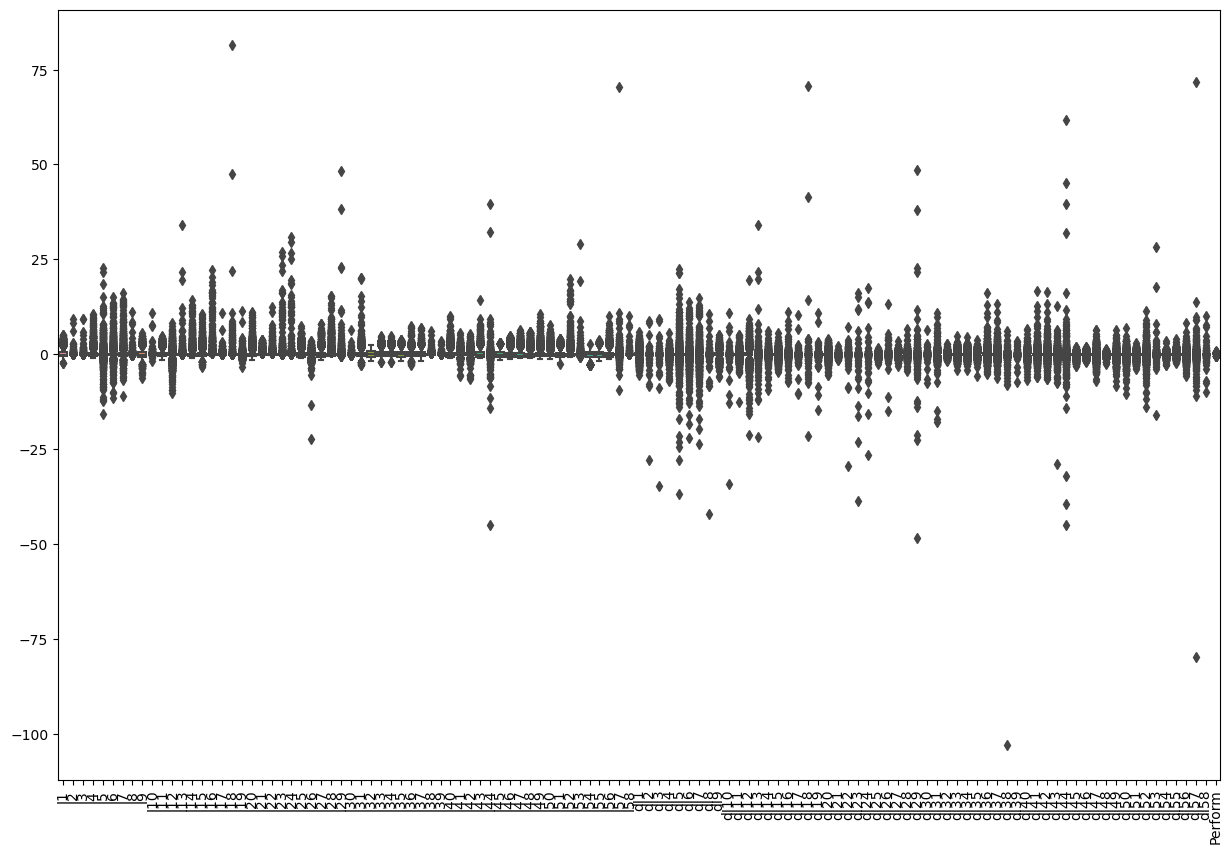

In [250]:
# using boxplot to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)
plt.show()

In [251]:
import pandas as pd
from scipy.stats import zscore


numeric_df = train_data.select_dtypes(include='number')

# Iterate through each numerical column
for column in numeric_df.columns:
    # Calculate the Z-score for each value in the column
    z_scores = zscore(numeric_df[column], nan_policy='omit')  # Calculate Z-scores, omitting NaN values

    # Identify outliers with Z-score less than -3 or greater than 3
    outliers = train_data[(z_scores < -3) | (z_scores > 3)]


    # Print the outliers
    if not outliers.empty:
        print(f"\nOutliers in column '{column}' using Z-score method:")
        print(len(outliers))
           




Outliers in column 'I1' using Z-score method:
109

Outliers in column 'I2' using Z-score method:
30

Outliers in column 'I3' using Z-score method:
32

Outliers in column 'I4' using Z-score method:
135

Outliers in column 'I5' using Z-score method:
119

Outliers in column 'I6' using Z-score method:
135

Outliers in column 'I7' using Z-score method:
127

Outliers in column 'I8' using Z-score method:
34

Outliers in column 'I9' using Z-score method:
83

Outliers in column 'I10' using Z-score method:
36

Outliers in column 'I11' using Z-score method:
140

Outliers in column 'I12' using Z-score method:
170

Outliers in column 'I13' using Z-score method:
37

Outliers in column 'I14' using Z-score method:
111

Outliers in column 'I15' using Z-score method:
142

Outliers in column 'I16' using Z-score method:
86

Outliers in column 'I17' using Z-score method:
88

Outliers in column 'I18' using Z-score method:
33

Outliers in column 'I19' using Z-score method:
113

Outliers in column 'I20' usin

In [252]:
outliers = pd.Series(False, index=train_data.index)
    
outliers = (z_scores < -3) | (z_scores > 3)

# Remove outliers from the data using the adjusted boolean mask
train_data = train_data[~outliers]

# Display the first few rows of the filtered DataFrame to verify the results
print("Filtered DataFrame without outliers:")
train_data


Filtered DataFrame without outliers:


,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Perform
0,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,-0.014757,...,0.077110,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-0.033764
1,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,-0.037353,...,0.006128,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,0.127771
2,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,-0.025008,...,-0.001239,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,0.183500
3,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,-0.011783,...,-0.001239,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-0.035668
4,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,-0.023262,...,-0.095963,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,0.235055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.946477,-0.039767,-0.051916,-0.000843,-9.099326,1.470616,1.470374,-0.045827,-1.323460,-0.030871,...,-0.001239,-0.001500,0.009714,-0.015913,0.019281,-0.000427,-0.642472,-4.266003,0.009687,0.239101
7996,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,-0.034396,...,-0.105101,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877,0.242938
7997,0.323233,-0.031075,-0.045713,-0.105448,-0.103823,0.153551,-0.052157,-0.056057,-0.163512,-0.018169,...,0.167119,0.245000,0.079662,-0.009150,-0.191322,-0.083576,0.024407,0.299832,-0.011129,0.279085
7998,1.084416,-0.028497,-0.047528,-0.180118,-0.634162,0.143589,-0.033258,-0.058396,0.088713,-0.021483,...,-0.280183,-0.041688,-0.238481,0.006060,-0.016044,0.000000,0.209235,-0.165349,0.012005,-0.171056


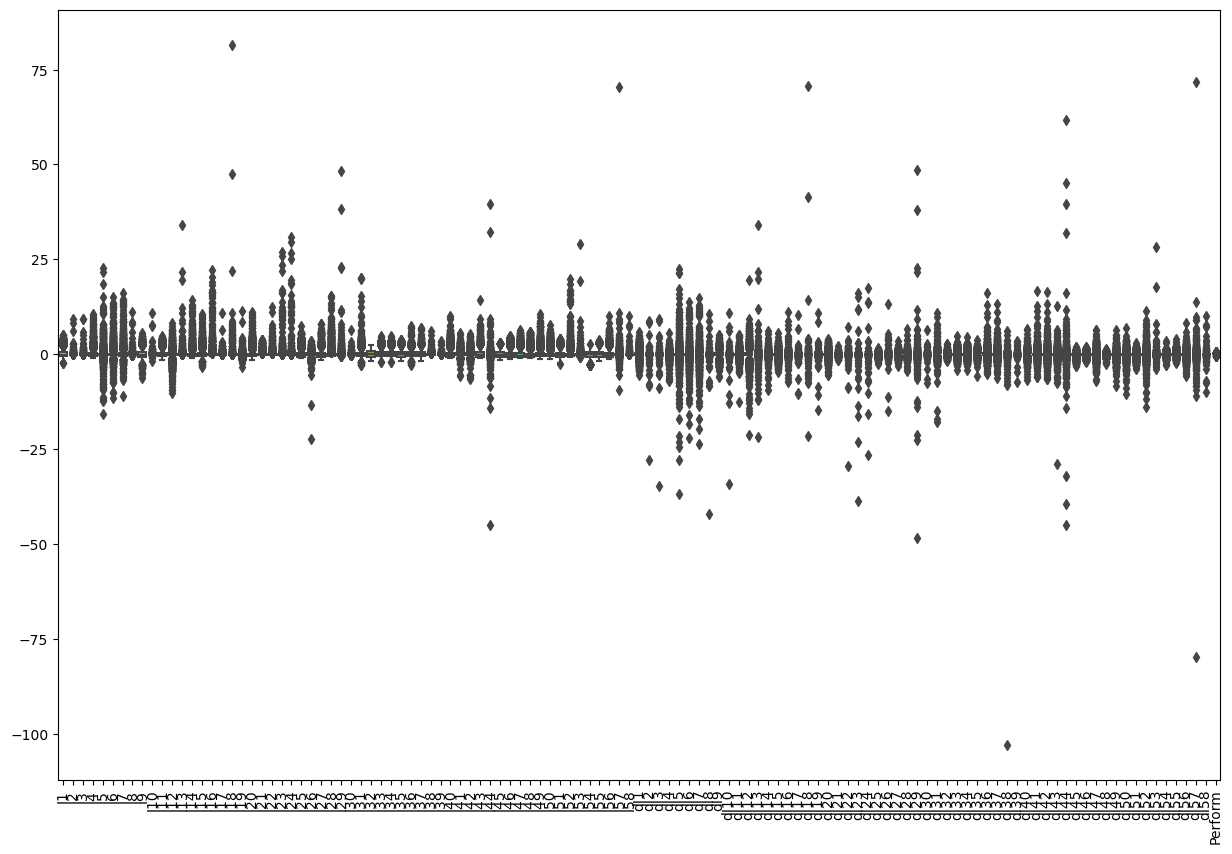

In [168]:
# using boxplot to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)
plt.show()

# Data Visualization

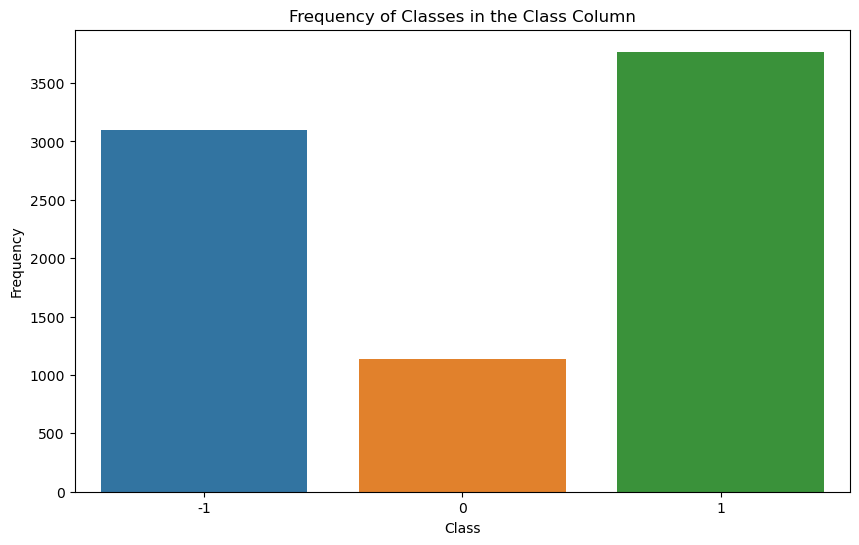

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x=target)
plt.title('Frequency of Classes in the Class Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



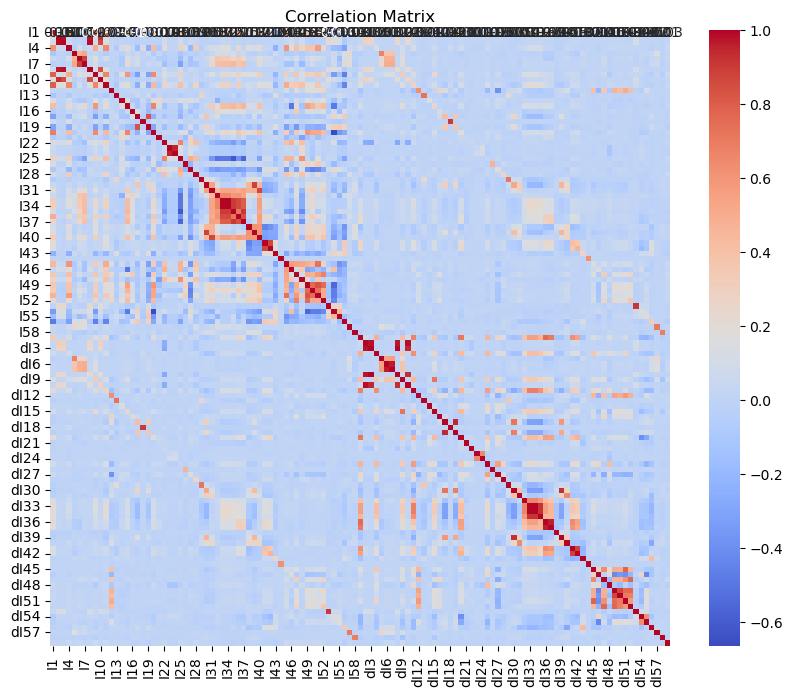

In [254]:
# Calculate correlation matrix
correlation_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

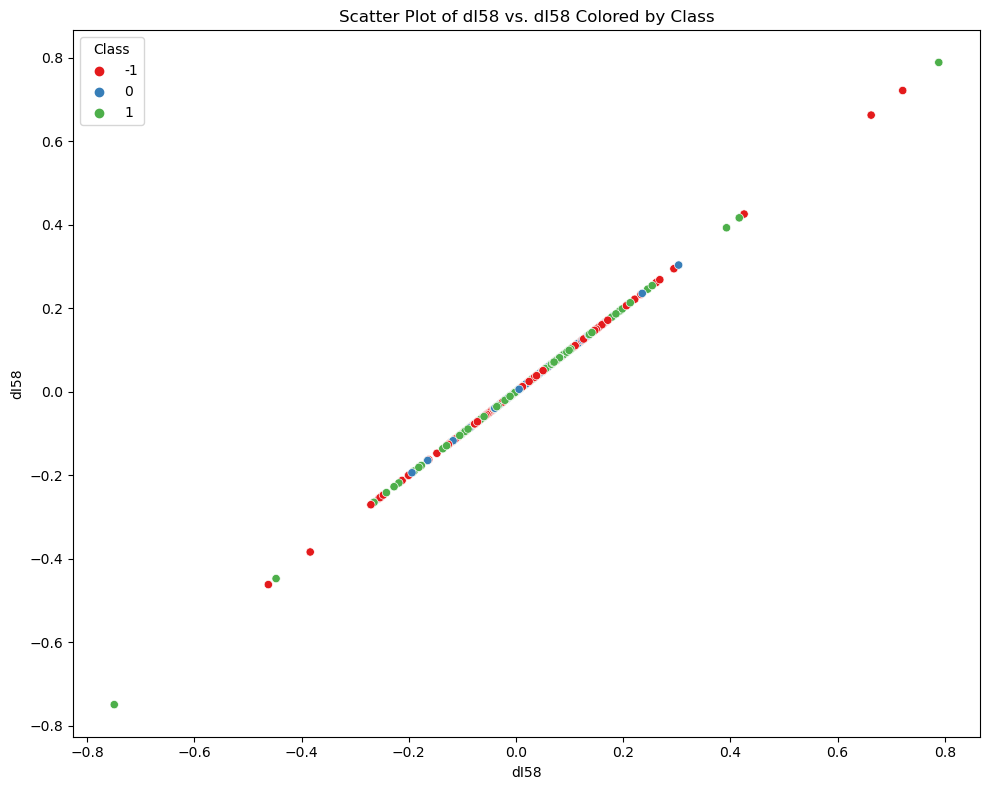

In [41]:

# Define the two numerical columns you want to scatter plot
numerical_column1 = 'dI58'  # Replace with the name of the first numerical column
numerical_column2 = 'dI58'  # Replace with the name of the second numerical column

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=train_data,
    x=numerical_column1,
    y=numerical_column2,
    hue=target,  # Color points based on the 'Class' column
    palette='Set1'# Optional: Choose a color palette
)

# Add titles and labels
plt.title(f'Scatter Plot of {numerical_column1} vs. {numerical_column2} Colored by Class')
plt.xlabel(numerical_column1)
plt.ylabel(numerical_column2)
plt.tight_layout()
# Show the plot
plt.show()

# Data Splitting

In [255]:
y= train_data['Perform']
train_data.drop('Perform', axis=1, inplace=True)

C:\Users\beyza\AppData\Local\Temp\ipykernel_27620\924050744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('Perform', axis=1, inplace=True)


In [256]:

train_data

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,-0.014757,...,0.057151,0.077110,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265
1,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,-0.037353,...,0.005180,0.006128,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215
2,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,-0.025008,...,0.404158,-0.001239,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720
3,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,-0.011783,...,0.001799,-0.001239,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046
4,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,-0.023262,...,-0.080892,-0.095963,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.946477,-0.039767,-0.051916,-0.000843,-9.099326,1.470616,1.470374,-0.045827,-1.323460,-0.030871,...,-0.002619,-0.001239,-0.001500,0.009714,-0.015913,0.019281,-0.000427,-0.642472,-4.266003,0.009687
7996,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,-0.034396,...,-0.132921,-0.105101,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877
7997,0.323233,-0.031075,-0.045713,-0.105448,-0.103823,0.153551,-0.052157,-0.056057,-0.163512,-0.018169,...,0.292396,0.167119,0.245000,0.079662,-0.009150,-0.191322,-0.083576,0.024407,0.299832,-0.011129
7998,1.084416,-0.028497,-0.047528,-0.180118,-0.634162,0.143589,-0.033258,-0.058396,0.088713,-0.021483,...,-0.142518,-0.280183,-0.041688,-0.238481,0.006060,-0.016044,0.000000,0.209235,-0.165349,0.012005


In [173]:
# define the parameter grid to search
param_grid = {
    'k': [1,2,4,11,22]  # Regularization parameter
}

# initialize the SVM classifier
model = DecisionTreeClassifier()


# create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv='k', scoring='accuracy', n_jobs=-1)

X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2, random_state=42)
print(X_train.shape)


(6377, 116)


# Data Improvement

In [257]:
print('BEFORE PolynomialFeatures',train_data.shape)
poly = PolynomialFeatures()
X_interactions = poly.fit_transform(train_data)
print('X_interactions',X_interactions.shape)
print('y',y.shape)

# select the best 10 features
selector = SelectKBest(score_func=f_regression)
X_interactions = selector.fit_transform(X_interactions, y)


# Convert to a DataFrame for easier viewing and manipulation
X_interactions_df = pd.DataFrame(X_interactions, columns=selector.get_feature_names_out())
print('X_interactions filtered',X_interactions.shape)


BEFORE PolynomialFeatures (7972, 116)
X_interactions (7972, 6903)
y (7972,)
X_interactions filtered (7972, 10)


# Data Splitting 2

In [258]:
X_train, X_val, y_train, y_val = train_test_split(X_interactions_df, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)

X_train (6377, 10)


# Normalization

In [263]:
norm='std'


| ---------------------- |
| DATASET NORMALIZATION: |
| ---------------------- |



c:\Users\beyza\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


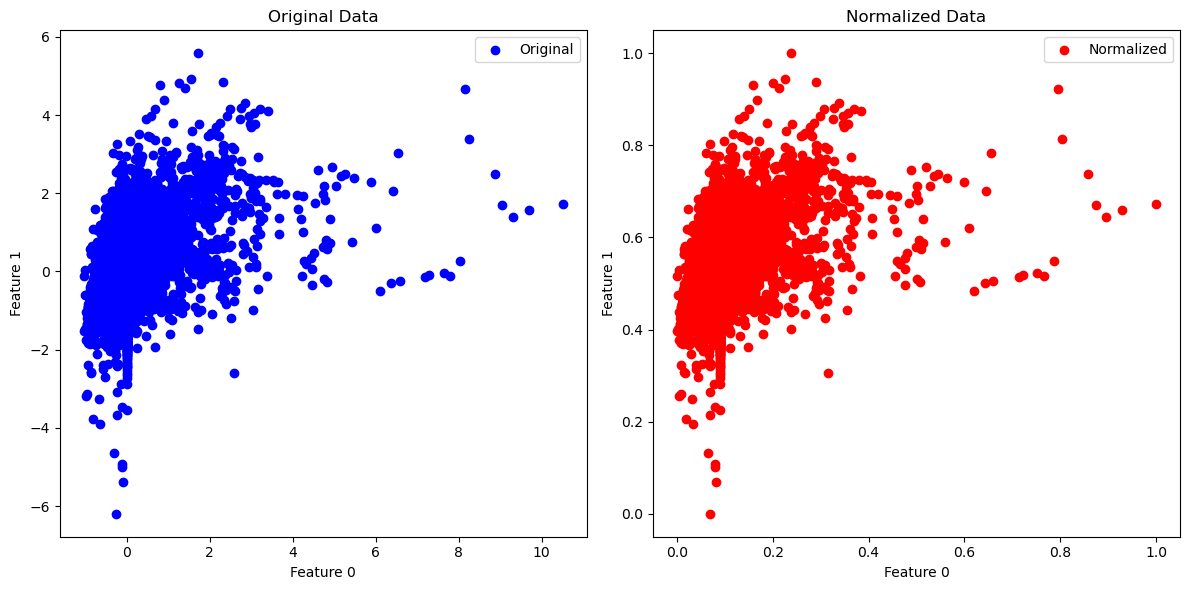

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose normalization method
norm = 'min-max'  # Or 'std' or 'none'

print("| ---------------------- |\n"
      "| DATASET NORMALIZATION: |\n"
      "| ---------------------- |\n")

# Apply Min-Max normalization
if norm == 'min-max':
    scaler = MinMaxScaler()

# Apply Standard normalization
elif norm == 'std':
    scaler = StandardScaler()

# If none, keep the original data
else:
    sys.exit("ERROR: Dataset Normalization must be one of [min-max, std, none]")

# Apply normalization if required
if norm != 'none':
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
   
else:
    X_train_scaled = X_train
    X_val_scaled = X_val

# Features indices for plotting
feature_idx_1 = 0
feature_idx_2 = 1

# Create a figure
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, feature_idx_1], X_train[:, feature_idx_2], color='blue', label='Original')
plt.title('Original Data')
plt.xlabel(f'Feature {feature_idx_1}')
plt.ylabel(f'Feature {feature_idx_2}')
plt.legend()

# Plot normalized data
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, feature_idx_1], X_train_scaled[:, feature_idx_2], color='red', label='Normalized')
plt.title('Normalized Data')
plt.xlabel(f'Feature {feature_idx_1}')
plt.ylabel(f'Feature {feature_idx_2}')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Model Fitting and testing
1. Decision Tree

In [264]:
print('X_train_scaled',X_train_scaled.shape)
print('X_val_scaled',X_val_scaled.shape)
print('y_train',y_train.shape)
print('y_val',y_val.shape)

X_train_scaled (6377, 10)
X_val_scaled (1595, 10)
y_train (6377,)
y_val (1595,)


In [260]:
model_name = 'DecisionTree'

In [265]:
from sklearn.linear_model import LogisticRegression

print("| --------------- |\n"
      "| MODEL CREATION: |\n"
      "| --------------- |\n")

# define KNeighborsClassifier model
if model_name == 'KNN':
    # define model
    # Define the KNN model
    knn_reg = KNeighborsRegressor()

    # Define hyperparameter grid for KNN
    param_grid = {'n_neighbors': range(1, 21)}

    # Hyperparameter tuning using cross-validation
    grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    # Evaluate the best combination of hyperparameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Create KNN model with best parameters
    best_knn_model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'])
    print("Model: {}\n"
          .format(model_name))

# define LogisticRegression model
elif model_name == 'LogisticRegression':
    # define model
    model = LogisticRegression()

    print("Model: {}".format(model_name))

# define DecisionTreeClassifier model
elif model_name == 'DecisionTree':
    # define model
    model = DecisionTreeClassifier()

    print("Model: {}".format(model_name))

else:
      sys.exit("ERROR: Model Creation [KNN, LogisticRegression, DecisionTree]")

| --------------- |
| MODEL CREATION: |
| --------------- |

Model: DecisionTree


In [266]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train the model
model.fit(X_train_scaled, y_train)

# Perform predictions on the test set
predictions_test = model.predict(X_val)

# Compute the accuracy of the predictions
accuracy = accuracy_score(y_val, predictions_test)

# Display the accuracy
print(f"Accuracy: {accuracy:.3f}")

# Convert continuous `y_val` to discrete classes (if necessary)
if not np.issubdtype(y_val.dtype, np.integer):
    # For example, round to nearest integer
    y_val = np.round(y_val).astype(int)

# Convert continuous `y_train` to discrete classes (if necessary)
if not np.issubdtype(y_train.dtype, np.integer):
    # For example, round to nearest integer
    y_train = np.round(y_train).astype(int)

# Obtain the unique labels from `y_train` (or `y_val`) and convert to strings
unique_labels = np.unique(y_train)
target_names = [str(label) for label in unique_labels]

# Compute the classification report
cls_report = classification_report(y_val, predictions_test, target_names=target_names)

# Display classification report
print("\nClassification Report:")
print(cls_report)




ValueError: Unknown label type: 'continuous'

# Errors and performance

In [ ]:
mse = mean_squared_error(y_val, y_pred_poly)
r2 = r2_score(y_val, y_pred_poly)

print(f'Mean Squared Error: {mse}')
print(f'rsme: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')
print(f'Intercept: {lr.intercept_}')
print(f'Coefficients: {np.round(lr.coef_, 0)}')

print(f'Accuracy: {lr.score(X_val_scaled, y_val)}')
# f statistic
f_statistic = (r2 / (1 - r2)) * ((len(X_val_scaled) - len(lr.coef_) - 1) / len(lr.coef_))
print(f'F-statistic: {f_statistic}')

# Performance Visualization
1. Heteroscedasticity, Residuals

In [ ]:
# Check for heteroscedasticity by plotting residuals against predicted values
residuals = target_test - y_pred_linear
#plt.scatter(y_pred_linear, residuals)
sns.residplot(x=y_pred_linear, y=residuals, line_kws={'color': 'red', 'lw':2}, lowess=True)
plt.xlabel("y_pred_linear")
plt.ylabel("Residuals")
plt.title("Residuals vs Linear Regression Predictions")
plt.show()